# Code for Data Analysis

This notebook provides code to generate figures and data included in the manuscript.

Please ensure the existence of involved files before running the code.

When producing the figures and tables only, it is necessary to run blocks for generating the JSON files in `./data/process_data/`, because they have been  already provided. 

In [22]:
# Common packages
import os
import util.global_variables as gv
import itertools
import json
import pandas as pd
import numpy as np

In [ ]:
# Obtain the directory path of the current notebook
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

# Obtain the directory path of the raw data
# ./data/raw_data
data_root_dir = os.path.join(
    parent_dir,
    "data",
    "raw_data",
)

In [24]:
# Optional setting for the plot font
import matplotlib.pyplot as plt

# Set Palatino Linotype font globally
plt.rcParams['font.family'] = 'Palatino Linotype'
plt.rcParams['text.usetex'] = False
# Configure mathtext (LaTeX) to use Palatino Linotype font as well
plt.rcParams['mathtext.fontset'] = 'custom'  # Use custom font set for mathtext
plt.rcParams['mathtext.rm'] = 'Palatino Linotype'  # Roman font (text)
plt.rcParams['mathtext.it'] = 'Palatino Linotype:italic'  # Italic font
plt.rcParams['mathtext.bf'] = 'Palatino Linotype:bold'  # Bold font


## Test Example of the Artificial Program


### Motivation Example

Before running the code to plot the figure, the following files should be appended to the current path.
+ `shots=1000_MWTest.csv`
+ `shots=10000_MWTest.csv`
+ `shots=100000_MWTest.csv`

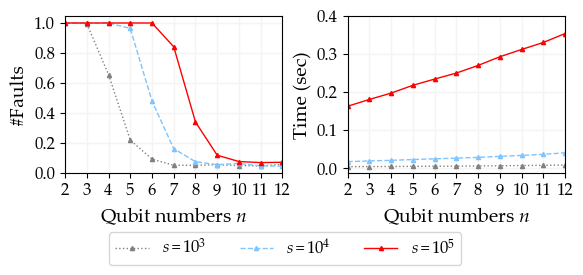

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 

shots_list = [1000, 10000, 100000]

# arguments for the figure
fontsize = 14
labelsize = 12
linewidth = 1
markersize = 3
figsize = (8, 2.5)
colors = ['grey', '#7FC4FD', 'red']
marker = '^'
linestyles = [':', '--', '-']


# Read the json file of RQ4-1 
motivation_parent_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "motivation"
)
 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
for i, shots in enumerate(shots_list):
    # read the .csv files
    file_name = f"shots={shots}_MWTest.csv"
    file_path = os.path.join(motivation_parent_dir, file_name)
    df = pd.read_csv(file_path)
    qubit_list = df.iloc[:, 0]
    fault_list = df.iloc[:, 1]
    time_list = df.iloc[:, 2]
    
    ax1.plot(qubit_list, 
             fault_list, 
             marker=marker, 
             linestyle=linestyles[i], 
             color=colors[i],
             label='$s=10^{}$'.format(int(math.log10(shots))),
             linewidth=linewidth,
             markersize=markersize)
    ax2.plot(qubit_list, 
             time_list, 
             marker=marker, 
             linestyle=linestyles[i], 
             color=colors[i],
             linewidth=linewidth,
             markersize=markersize)    
    
    ax1.set_ylabel('#Faults', color='black', fontsize=fontsize)
    ax1.tick_params(axis='y', labelcolor='black', labelsize=labelsize)
    ax1.tick_params(axis='x', labelcolor='black', labelsize=labelsize)
    ax2.set_ylabel('Time (sec)', color='black', fontsize=fontsize)
    ax2.tick_params(axis='y', labelcolor='black', labelsize=labelsize)
    ax2.tick_params(axis='x', labelcolor='black', labelsize=labelsize) 

ax1.set_xlim(2, 12)
ax1.set_xticks(np.arange(2, 13, 1))
ax2.set_xlim(2, 12)
ax2.set_xticks(np.arange(2, 13, 1))
ax1.set_xlabel(r'Qubit numbers $n$', fontsize=fontsize)
ax2.set_xlabel(r'Qubit numbers $n$', fontsize=fontsize)
ax1.set_yticks(np.arange(0, 1.01, 0.2))
ax2.set_yticks(np.arange(0, 0.42, 0.1))

ax1.grid(True, which='both', axis='both', linestyle='-', color="#F5F4F3D6", linewidth=1)
ax2.grid(True, which='both', axis='both', linestyle='-', color="#F5F4F3D6", linewidth=1)

fig.legend(
    loc='lower center',          # Place the legend at the bottom center of the figure
    bbox_to_anchor=(0.4, -0.15), # Adjust the offset position (x=0.5 is horizontally centered, y slightly below the figure)
    ncol=3,                      # Display in three columns
    fontsize=labelsize
)

plt.subplots_adjust(wspace=0.3, right=0.75, bottom=0.25)
 
# display the figure
plt.savefig(os.path.join(motivation_parent_dir, 'motivation.pdf'), dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

### Case Study

Before running the code to plot the figure, the following files should be appended to the current path.
+ `shots=20_MWTest.csv`
+ `shots=100000_MWTest.csv`
+ `shots=20_HOSS.csv`

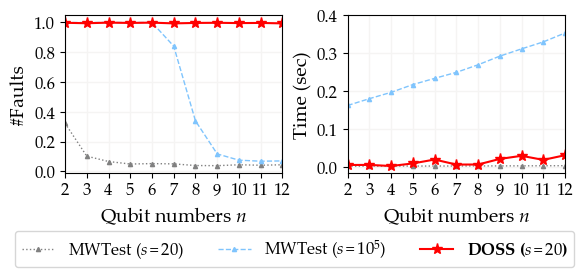

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

shots_list = [20, 100000, 20]
test_oracles = ['MWTest', 'MWTest', 'DOSS']

# arguments for the figure
fontsize = 14
labelsize = 12
linewidth = 1
markersize = 3
figsize = (8, 2.5)
colors = ['grey', '#7FC4FD', 'red']
markers = ['^', '^', '*']
linestyles = [':', '--', '-']

# Read the json file of RQ4-1 
motivation_parent_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "motivation"
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
for i, shots in enumerate(shots_list):
    # read the .csv files
    file_name = "shots={}_{}.csv".format(shots, test_oracles[i])
    file_path = os.path.join(motivation_parent_dir, file_name)
    df = pd.read_csv(file_path)
    qubit_list = df.iloc[:, 0]
    fault_list = df.iloc[:, 1]
    time_list = df.iloc[:, 2]
    
    if i == 0:
        label = 'MWTest ($s=20$)'
    elif i == 1:
        label = 'MWTest ($s=10^5$)'
    elif i == 2:
        label = 'DOSS ($s=20$)'

    if i == 2:
        temp_markersize = markersize + 5
        temp_linewidth = linewidth + 0.5
    else:
        temp_markersize = markersize
        temp_linewidth = linewidth

    ax1.plot(qubit_list, 
             fault_list, 
             marker=markers[i], 
             linestyle=linestyles[i], 
             color=colors[i],
             label=label,
             linewidth=temp_linewidth,
             markersize=temp_markersize)
    ax2.plot(qubit_list, 
             time_list, 
             marker=markers[i], 
             linestyle=linestyles[i], 
             color=colors[i],
             linewidth=temp_linewidth,
             markersize=temp_markersize)    
    
    ax1.set_ylabel('#Faults', color='black', fontsize=fontsize)
    ax1.tick_params(axis='x', labelcolor='black', labelsize=labelsize)
    ax1.tick_params(axis='y', labelcolor='black', labelsize=labelsize)
    ax2.set_ylabel('Time (sec)', color='black', fontsize=fontsize)
    ax2.tick_params(axis='x', labelcolor='black', labelsize=labelsize)
    ax2.tick_params(axis='y', labelcolor='black', labelsize=labelsize) 


ax1.set_xlim(2, 12)
ax1.set_xticks(np.arange(2, 13, 1))
ax2.set_xlim(2, 12)
ax2.set_xticks(np.arange(2, 13, 1))
ax1.set_xlabel(r'Qubit numbers $n$', fontsize=fontsize)
ax2.set_xlabel(r'Qubit numbers $n$', fontsize=fontsize)
ax1.set_yticks(np.arange(0, 1.01, 0.2))
ax2.set_yticks(np.arange(0, 0.42, 0.1))

ax1.grid(True, which='both', axis='both', linestyle='-', color="#F5F4F3D6", linewidth=1)
ax2.grid(True, which='both', axis='both', linestyle='-', color="#F5F4F3D6", linewidth=1)

legend = fig.legend(
    loc='lower center',             # Place the legend at the bottom center of the figure
    bbox_to_anchor=(0.412, -0.16),  # Adjust the offset position (x=0.5 is horizontally centered, y slightly below the figure)
    ncol=3,                         # Display in three columns
    fontsize=labelsize
)

legend_texts = legend.get_texts()
legend_texts[-1].set_fontweight('bold')

plt.subplots_adjust(wspace=0.3, right=0.75, bottom=0.25)

# Display the figure
plt.savefig(os.path.join(motivation_parent_dir, 'case_study.pdf'), dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Global Settings for Plots

The following variables are the global setting for plots of each experiment. Herein, we defined the unique color for each candidate test oracle.

In [ ]:
# Setting for diagram
width = 0.8
fontsize = 14
labelsize = 12
linewidth = 1

oracle_properties = {
    "MWTest": {
        'label': 'Mann–Whitney U test',
        'linestyle': '-.',
        'color': '#1F77B4',  # Blue
        'linewidth': linewidth
    },
    "KSTest": {
        'label': 'Kolmogorov-Smirnov test',
        'linestyle': '-.',
        'color': "#B8870BD1",  # Dark goldenrod
        'linewidth': linewidth
    },
    "ChiTest": {
        'label': 'Chi-squared test',
        'linestyle': '-.',
        'color': '#9467BD',  # Purple
        'linewidth': linewidth
    },
    "DMSQ-ChiTest": {
        'label': 'DMSQ for Chi-squared test',
        'linestyle': '-.',
        'color': '#C39BD3',  # Light purple (similar to ChiTest)
        'linewidth': linewidth
    },
    "JSDiv": {
        'label': 'Jensen–Shannon divergence',
        'linestyle': '--',
        'color': '#2CA02C',  # Green
        'linewidth': linewidth
    },
    "CrsEnt": {
        'label': 'Cross entropy',
        'linestyle': '--',
        'color': '#17BECF',  # Teal
        'linewidth': linewidth
    },
    "DMSQ-CrsEnt": {
        'label': 'DMSQ for Cross entropy',
        'linestyle': '--',
        'color': '#9EDAE5',  # Light teal (consistent with above color scheme)
        'linewidth': linewidth
    },
    "ExpVal": {
        'label': 'Expected expectation',
        'linestyle': '--',
        'color': '#8C564B',  # Brown
        'linewidth': linewidth
    },
    "STFQ": {
        'label': 'Swap test with full qubits',
        'linestyle': 'dotted',
        'color': "#E0DD07",  # Warm orange
        'linewidth': linewidth
    },
    "STSQ": {
        'label': 'Swap test with separable qubits',
        'linestyle': 'dotted',
        'color': '#E76F51',  # Warm red
        'linewidth': linewidth
    },
    "DOSS": {
        'label': 'DOSS',
        'linestyle': '-',
        'color': 'red',
        'linewidth': linewidth + 0.25
    },
    "Truth": {
        'label': 'Truth',
        'linestyle': ':',
        'color': 'black',
        'linewidth': linewidth
    }
}

oracle_dict = gv.total_baselines

## RQ1 Comparison to Statistical Methods:

### Disposal Data

Read all the raw data in `./raw_data/RQ1-1` and `./raw_data/RQ1-2` and save the processed data in `./processed_data/RQ1-1.json` and `./processed_data/RQ1-2.json` correspondingly.

In [8]:
# Readin the default settings
task_dict = {"task1": "RQ1-1", "task2": "RQ1-2"}

total_repeats = gv.default_rq_settings["common"]["total_repeats"]

for task_name, rq_name in task_dict.items():
    rq_task_setting = gv.default_rq_settings['RQ1'][task_name]
    rq_abb_names = rq_task_setting['abb_programs']          # List
    rq_vers = rq_task_setting['program_versions']           # List
    rq_shots_dict = rq_task_setting['shots_dict']           # Dict
    rq_oracles = rq_task_setting['test_oracles']            # List
    rq_backend = rq_task_setting['backend']                          
    rq_qubit_num = rq_task_setting['total_qubits']       
    rq_opos = rq_task_setting['errs']['opos']               # List    
    rq_woos = rq_task_setting['errs']['woos']               # List  

    # Form the data dict
    combined_varaibles = list(itertools.product(
            rq_abb_names,
            rq_vers,
            rq_oracles,
        )
    )
    stat_dict = {}

    rq_task_dir = os.path.join(data_root_dir, rq_name)

    for abb_name, rq_ver, rq_oracle in combined_varaibles:
        temp_shot_range = rq_shots_dict[abb_name]
        err_list = rq_opos if rq_oracle in oracle_dict['opos'] else rq_woos
        for temp_err in err_list:
            for temp_shot in temp_shot_range:
                for repeat_idx in range(1, total_repeats + 1):
                    file_name = (
                        f"{repeat_idx}_{abb_name}_{rq_ver}_RQ1_"
                        f"{rq_oracle}_shots={temp_shot}_err={temp_err}.csv"
                    )

                    csv_dir = os.path.join(
                        rq_task_dir,
                        abb_name,
                        rq_oracle,
                        file_name
                    )

                    # Read the file
                    # print(csv_dir)
                    df = pd.read_csv(csv_dir)
                    req_header = df.columns[:6].tolist()   # The first 6 are the experimental results
                    req_data = df.iloc[0, :6].tolist()
                    
                    # The first appearance
                    if repeat_idx == 1:
                        temp_res_dict = {
                            key: [int(val)] if isinstance(val, (np.integer, int)) else [val]
                            for key, val in zip(req_header, req_data)
                        }
                        # Initialization 
                        stat_dict.setdefault(abb_name, {}).setdefault(rq_ver, {}).setdefault(rq_oracle, {}).setdefault(temp_err, {}).setdefault(temp_shot, temp_res_dict)
                    else:   # Append to the constructed list
                        for key, val in zip(req_header, req_data):
                            if isinstance(val, (np.integer, int)):  # Int64 is not acceptable for json files
                                stat_dict[abb_name][rq_ver][rq_oracle][temp_err][temp_shot][key].append(int(val))
                            else:
                                stat_dict[abb_name][rq_ver][rq_oracle][temp_err][temp_shot][key].append(val)

    # Obtain the directory path of the raw data
    save_dir = os.path.join(
        parent_dir,
        "data",
        "processed_data",
    )
    os.makedirs(save_dir, exist_ok=True)
    save_file = os.path.join(save_dir, f"{task_dict[task_name]}.json")

    # Save the dictionary as the json file
    with open(save_file, 'w', encoding='utf-8') as f:
        json.dump(stat_dict, f, indent=2)

### Plotting for Detected Faults Varied with Shots (RQ1-1)

Read the file `./processed_data/RQ1-1.json` and produce curves for each program's five versions. All the figures and the corresponding legend are saved in `./displayed_data/RQ1-1`.

#### Figures

In [12]:
import matplotlib.pyplot as plt
import numpy as np

######################### Experimental Settings #########################  
abb_names = ['LPR', 'LAF', 'QFT', 'DO', 'IC', 'WA']
program_versions = ['v1', 'v2', 'v3', 'v4', 'v5']
test_oracles = ["KSTest", "ChiTest", "MWTest", "JSDiv", "CrsEnt", "ExpVal", "DOSS"]
repeats_ids = range(1, 21, 1)
#########################################################################
 
# The directory path for RQ1 subtask1
rq1_t1_dir = os.path.join(data_root_dir, "RQ1-1")
shots_dict = {
    "DO":   range(5, 201, 5),
    "IC":   range(2, 51, 2),    # This program is expected to output a deterministic result
    "LAF":  range(5, 201, 5),
    "LPR":  range(5, 201, 5),
    "QFT":  range(5, 201, 5),
    "WA":   range(2, 51, 2),    # This program is expected to output a deterministic result
}


# Figure setting
figsize_para = (4.4, 2)

# Read the json file of RQ4-1 
file_name_noisy = "RQ1-1.json"
json_dir_noisy = os.path.join(
    parent_dir,
    "data",
    "processed_data",
    file_name_noisy
)
with open(json_dir_noisy, "r") as f:
    stat_dict = json.load(f)

# Plot the result
for abb_name, data_of_a_ver in stat_dict.items():
    print("program: {}".format(abb_name))
    for program_version, data_of_an_oracle in data_of_a_ver.items(): 
        fig, ax = plt.subplots(1, 1, figsize=figsize_para)
        for oracle, data_of_an_err in data_of_an_oracle.items():
            data_of_shots = list(data_of_an_err.values())[0]    # One element for a dict
            x1 = [int(shot) for shot in data_of_shots.keys()]
            y1 = [np.mean(final_res_dict["#faults"]) for final_res_dict in data_of_shots.values()]   # Average faults among repeats
 
            # Check if the oracle exists in the dictionary and plot
            if oracle in oracle_properties:
                props = oracle_properties[oracle]
                ax.plot(x1, y1, label=props['label'], linewidth=props['linewidth'], linestyle=props['linestyle'], color=props['color']) 
        
        ax.plot(x1, [25]*len(x1), label='Truth', linewidth=linewidth-0.25, linestyle=':',color='black')

        # relevant settings
        ax.set_title(r'$\mathbf{' + abb_name + '}$', fontsize=fontsize+1)
        ax.set_xlabel('Shots $s$', fontsize=fontsize)
        ax.set_ylabel('#Faults', fontsize=fontsize)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)
        ax.grid(True, which='both', axis='y', linestyle='-', color="#F5F4F3D6", linewidth=1)
        # set the interval adaptive to each program
        if abb_name in ["LPR", "LAF"]:
            ax.set_ylim(0, 44)
            ax.set_xlim(0, 201)        
            ax.set_xticks(np.arange(0, 201, 25)) 
            ax.set_yticks(np.arange(0, 44, 10))   
        elif abb_name in ["QFT", "DO"]:
            ax.set_ylim(0, 55)
            ax.set_xlim(0, 201)        
            ax.set_xticks(np.arange(0, 201, 25))  
            ax.set_yticks(np.arange(0, 55, 10))    
        elif abb_name in ["IC", "WA"]:
            ax.set_ylim(0, 28)
            ax.set_xlim(0, 51)
            ax.set_xticks(np.arange(0, 51, 5))   
            ax.set_yticks(np.arange(0, 28, 5))     
    
        plt.subplots_adjust(wspace=0.4, right=0.75)
    
        save_dir = os.path.join(
            parent_dir,
            "data",
            "displayed_data",
            "RQ1-1",
        )
        os.makedirs(save_dir, exist_ok=True)
        save_file = os.path.join(save_dir, f"{abb_name}_{program_version}_RQ1-1_varied_shots.pdf")
        plt.savefig(save_file, dpi=600, bbox_inches='tight', pad_inches=0.1)
        plt.close()
 
 
 

program: DO
program: IC
program: LAF
program: LPR
program: QFT
program: WA


#### Legend 

Plot the legend of above figures.

In [13]:
from matplotlib.lines import Line2D
 
# linewidth = 1
markersize = 3
 
labelsize = 10
figsize_para = (0.2, 0.3)

 
# define the legends
legend_elements = [
    Line2D([0], [0], 
           color=oracle_properties[oracle_name]['color'], 
           linestyle=oracle_properties[oracle_name]['linestyle'], 
           label=oracle_name, 
           linewidth=oracle_properties[oracle_name]['linewidth'])
    for oracle_name in ["KSTest", "ChiTest", "MWTest", "JSDiv", "CrsEnt", "ExpVal", "DOSS", "Truth"]
]
plt.figure(figsize=figsize_para)

legend = plt.legend(ncol=4, handles=legend_elements, loc='center', fontsize=fontsize)
legend_texts = legend.get_texts()
legend_texts[-2].set_fontweight('bold')
plt.axis('off')

save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ1-1",
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, "RQ1-1_legend_shots.pdf")
plt.savefig(save_file, dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.close()

### Generating the Table (RQ1-1)

The following code is used to produce data in TABLE II, where the three metrics (i.e., $s^*$, $\delta^*$ and $\sigma^*$) are calculated. 

#### JSON File
Read the file `./processed_data/RQ1-2.json`. We save the raw data of TABLE II in `./displayed_data/RQ1-1/RQ1-1_table.json`.

In [ ]:
import pandas as pd
from util.output_analysis import find_stable_point

rq_task_setting = gv.default_rq_settings['RQ1']['task1']
abb_names = rq_task_setting['abb_programs']           
program_versions = rq_task_setting['program_versions']
test_oracles = rq_task_setting['test_oracles']

 
# Read the json file of RQ1-1 
file_name_ideal = "RQ1-1.json"
json_dir_ideal = os.path.join(
    parent_dir,
    "data",
    "processed_data",
    file_name_ideal
)
with open(json_dir_ideal, "r") as f:
    stat_dict = json.load(f)

req_res_dict = {}
for abb_name, data_of_a_ver in stat_dict.items():
    req_res_dict[abb_name] = {}
    for program_version, data_of_an_oracle in data_of_a_ver.items(): 
        req_res_dict[abb_name][program_version] = {}
        for oracle, data_of_an_err in data_of_an_oracle.items():
            data_of_shots = list(data_of_an_err.values())[0]    # One element for a dict
            shot_list = list(data_of_shots.keys())
            ave_faults_list, std_faults_list = [], []
            for val_dict in data_of_shots.values():
                ave_faults_list.append(np.mean(val_dict["#faults"]))
                std_faults_list.append(np.std(val_dict["#faults"]))

            s_star, delta_star, sigma_star = find_stable_point(shot_list, ave_faults_list, std_faults_list)
            req_res_dict[abb_name][program_version][oracle] = {
                "s*" : s_star, "delta*": delta_star, "sigma*": sigma_star
            }


# Obtain the directory path of the raw data
save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ1-1"
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, f"RQ1-1_table.json")

# Save the dictionary as the json file
with open(save_file, 'w', encoding='utf-8') as f:
    json.dump(req_res_dict, f, indent=2)


#### Latex Code
Automatically generate the latex code for TABLE II through the JSON file `RQ1-1_table.json`, where the saved file name is  `RQ1-1_table.tex`.

In [58]:
import json
import os

# Define the display order of programs
displayed_order = ["LPR", "LAF", "QFT", "DO", "IC", "WA"]

# Read the json file of RQ1-1 
file_name_ideal = "RQ1-1_table.json"
json_dir_ideal = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ1-1",
    file_name_ideal
)
with open(json_dir_ideal, "r") as f:
    tab_data = json.load(f)

# Determine the number of oracles
num_oracles = len(list(tab_data["DO"]["v1"].keys()))

# Define LaTeX column formats and headers
tex_tab_center = "|ccc" * num_oracles
tex_tab_header = "& $s^{{*}}$ & $\\delta^{{*}}$ & $\\sigma^{{*}}$ " * num_oracles

# LaTeX table header
latex_header = f"""
\\begin{{tabular}}{{c|c{tex_tab_center}}}
    \\toprule[1.25pt]
    \\multicolumn{{2}}{{c|}}{{\\multirow{{2}}{{*}}{{\\textbf{{QPs}}}}}} & \\multicolumn{{3}}{{c|}}{{\\textbf{{MWTest}}}} & \\multicolumn{{3}}{{c|}}{{\\textbf{{ChiTest}}}} & \\multicolumn{{3}}{{c|}}{{\\textbf{{KSTest}}}} & \\multicolumn{{3}}{{c|}}{{\\textbf{{CrsEnt}}}} & \\multicolumn{{3}}{{c|}}{{\\textbf{{JSDiv}}}} & \\multicolumn{{3}}{{c|}}{{\\textbf{{ExpVal}}}} & \\multicolumn{{3}}{{c}}{{\\textbf{{DOSS}}}} \\\\
    \\cmidrule{{3-{(3 + num_oracles * 3 - 1)}}}
    \\multicolumn{{2}}{{c|}}{{\\multirow{{2}}{{*}}{{\\textbf{{}}}}}} {tex_tab_header} \\\\
    \\midrule
"""

# LaTeX table footer
latex_footer = """
\\end{tabular}
"""

# Format numbers: convert to float and keep 2 decimal places
def format_number(value):
    try:
        return f"{float(value):.2f}"
    except ValueError:
        return str(value)

# Generate LaTeX rows for a given program (version-wise)
def generate_latex_for_program(program_data, if_last_one):
    rows = []
    baseline_names = ["MWTest", "ChiTest", "KSTest", "CrsEnt", "JSDiv", "ExpVal"]
    all_oracles = baseline_names + ["DOSS"]

    for idx, (program_version, tests) in enumerate(program_data.items()):
        row = [f"      & \\texttt{{{program_version}}}"] if idx == 0 else [f"    ~ & \\texttt{{{program_version}}}"]

        # Step 1: Extract s*, sigma*, delta* for each oracle
        stat_dict = {}
        for oracle_name in all_oracles:
            s = tests.get(oracle_name, {}).get("s*", "O/S")
            sigma = tests.get(oracle_name, {}).get("sigma*", "O/S")
            delta = tests.get(oracle_name, {}).get("delta*", "O/S")

            try:
                s_val = float(s)
            except:
                s_val = float('inf')
            try:
                sigma_val = abs(float(sigma))
            except:
                sigma_val = float('inf')
            try:
                delta_val = float(delta)
            except:
                delta_val = float('inf')

            stat_dict[oracle_name] = (s_val, sigma_val, delta_val)

        # Step 2: Find all best oracles (min s*, and sigma* = 0, delta* = 0)
        min_s = min(v[0] for v in stat_dict.values())
        best_oracles = {
            name for name, (s, sigma, delta) in stat_dict.items()
            if s == min_s and sigma == 0 and delta == 0
        }

        # Step 3: Generate LaTeX for each oracle's data
        for oracle_name in all_oracles:
            if oracle_name not in tests:
                row.extend(["O/S", "O/S", "O/S"])
                continue

            s_raw = tests[oracle_name].get("s*", "O/S")
            sigma_raw = tests[oracle_name].get("sigma*", "O/S")
            delta_raw = tests[oracle_name].get("delta*", "O/S")

            # Default formatting
            s_fmt = str(s_raw)
            sigma_fmt = format_number(sigma_raw)
            delta_fmt = format_number(delta_raw)

            # Bold DOSS metrics if not worse than all baselines
            if oracle_name == "DOSS":
                s_doss, sigma_doss, delta_doss = stat_dict["DOSS"]
                baseline_stats = [stat_dict[b] for b in baseline_names]
                for i, doss_val in enumerate([s_doss, sigma_doss, delta_doss]):
                    if i == 0:
                        all_vals = [b[0] for b in baseline_stats]
                    elif i == 1:
                        all_vals = [b[1] for b in baseline_stats]
                    else:
                        all_vals = [abs(b[2]) for b in baseline_stats]  # compare abs(delta*)
                    if doss_val <= min(all_vals):
                        if i == 0:
                            s_fmt = f"\\textbf{{{s_fmt}}}"
                        elif i == 1:
                            sigma_fmt = f"\\textbf{{{sigma_fmt}}}"
                        elif i == 2:
                            delta_fmt = f"\\textbf{{{delta_fmt}}}"

            # Highlight best oracles in cyan
            if oracle_name in best_oracles:
                s_fmt = f"\\cellcolor{{cyan!6}}{s_fmt}"
                sigma_fmt = f"\\cellcolor{{cyan!6}}{sigma_fmt}"
                delta_fmt = f"\\cellcolor{{cyan!6}}{delta_fmt}"

            row.extend([s_fmt, delta_fmt, sigma_fmt])


        rows.append(" & ".join(row) + " \\\\")
    
    if not if_last_one:
        rows.append("    \\midrule\n")

    return "\n".join(rows)

# Generate LaTeX table rows for each program
latex_table_data = []
for temp_abb in displayed_order:
    program_data = tab_data[temp_abb]
    if_last_one = (temp_abb == displayed_order[-1])
    table_data = generate_latex_for_program(program_data, if_last_one)
    latex_table_data.append(f"    \\multirow{{5}}{{*}}{{\\texttt{{{temp_abb}}}}} \n{table_data}")

latex_table_data.append("    \\bottomrule[1.25pt]\n")

# Compose the full LaTeX table
latex_code = latex_header + "\n".join(latex_table_data) + latex_footer

# Create directory to save the LaTeX file
save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ1-1"
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, f"RQ1-1_table.tex")

# Write the LaTeX code to a file
with open(save_file, 'w') as f:
    f.write(latex_code)


### Plotting for Variable Thresholds of SDMs (RQ1-2)

The following code plots 4 subfigures in Fig.9. These figures show the variation of $\delta^*$ with the thresholds involved in SDMs. 

Read the file `./processed_data/RQ1-2.json`. All the figures and the corresponding legend are saved in `./displayed_data/RQ1-2`.

#### Figures

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from util.output_analysis import find_stable_point

rq_task_setting = gv.default_rq_settings['RQ1']['task2']
abb_names = rq_task_setting['abb_programs']                 # List
program_versions = rq_task_setting['program_versions']      # List
test_oracles = rq_task_setting['test_oracles']              # List
backend = rq_task_setting['backend']                          
thresholds  = rq_task_setting['errs']['opos']               # List    

 
colors = ['#87CEFA', '#98FB98', '#FFB678', '#FFC0CB', '#E6E6FA']
 
width = 0.135
fontsize = 14
labelsize = 12
linewidth = 1
figsize_para = (3.5, 2.2)


# Read the json file of RQ4-1 
file_name_ideal = "RQ1-2.json"
json_dir_ideal = os.path.join(
    parent_dir,
    "data",
    "processed_data",
    file_name_ideal
)
with open(json_dir_ideal, "r") as f:
    stat_dict = json.load(f)

for abb_name, data_of_a_ver in stat_dict.items():
    # Obtain the oracle list in program_version 
    all_oracles = set()
    for _, data_of_an_oracle in data_of_a_ver.items():
        all_oracles.update(data_of_an_oracle.keys())

    for oracle in all_oracles:
        fig, ax = plt.subplots(1, 1, figsize=figsize_para)
        
        for version_id, (program_version, data_of_an_oracle) in enumerate(data_of_a_ver.items()):
            if oracle not in data_of_an_oracle:
                continue
            data_of_an_thre = data_of_an_oracle[oracle]

            thresholds = list(data_of_an_thre.keys())
            x1 = range(len(thresholds))
            delta_stb_list = []

            for threshold, data_of_shots in data_of_an_thre.items():
                shot_list = list(data_of_shots.keys())
                ave_faults_list, std_faults_list = [], []

                for val_dict in data_of_shots.values():
                    ave_faults_list.append(np.mean(val_dict["#faults"]))
                    std_faults_list.append(np.std(val_dict["#faults"]))

                _, delta_star, _ = find_stable_point(shot_list, ave_faults_list, std_faults_list)
                delta_stb_list.append(delta_star)

            ax.bar([xi + (version_id - 1) * width for xi in x1],
                   delta_stb_list,
                   width=width,
                   color=colors[version_id],
                   edgecolor='black',
                   linewidth=linewidth)

        ax.plot(x1, [0]*len(x1), linewidth=linewidth-0.25, linestyle=':', color='black')
        for xval in [0.65, 1.65, 2.65, 3.65]:
            plt.axvline(x=xval, color='gray', linestyle='--', linewidth=0.5)  # type: ignore
            
        ax.set_yticks(np.arange(-30, 31, 10))
        ax.set_ylim(-28, 28)
        ax.set_title(r'$\mathbf{' + abb_name + '}$' + f" ({oracle})", fontsize=fontsize+1)
        ax.set_ylabel(r'$\delta^{*}$', fontsize=fontsize)
        ax.set_xlabel('Thresholds for SDMs', fontsize=fontsize)
        ax.set_xticks([xi + width for xi in x1], thresholds)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)
        ax.grid(True, which='both', axis='y', linestyle='-', color="#F5F4F3D6", linewidth=1)
        # 将 grid 放到底层
        ax.set_axisbelow(True)
        save_dir = os.path.join(
            parent_dir,
            "data",
            "displayed_data",
            "RQ1-2",
        )
        os.makedirs(save_dir, exist_ok=True)
        save_file = os.path.join(save_dir, f"{abb_name}_{oracle}_RQ1-2_varied_thresholds.pdf")
        plt.savefig(save_file, dpi=600, bbox_inches='tight', pad_inches=0.1)
        plt.close()


#### Legend
Plot for legend for the above variable thresholds.

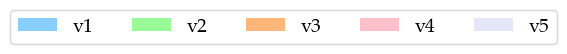

In [17]:
import matplotlib.patches as mpatches

program_versions = ['v1', 'v2', 'v3', 'v4', 'v5']
colors = ['#87CEFA', '#98FB98', '#FFB678', '#FFC0CB', '#E6E6FA']
linewidth = 1
markersize = 3
 
labelsize = 10
figsize_para = (0.2, 0.3)

n_items = len(colors)
 
legend_handles = [mpatches.Patch(facecolor=color, hatch=None, label=label) 
                 for color, label in zip(colors, program_versions)]
plt.figure(figsize=figsize_para)
legend = plt.legend(ncol=n_items, handles=legend_handles, loc='center', fontsize=fontsize)
plt.axis('off')

save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ1-2",
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, "RQ1-2_legend_thresholds.pdf")
plt.savefig(save_file, dpi=600, bbox_inches='tight', pad_inches=0.1)

## RQ2 Investigation on the Output Decomposition and Dynamic Scheme

### Disposal Data

Read all the raw data in `./raw_data/RQ2-1` and `./raw_data/RQ2-2` and save the processed data in `./processed_data/RQ2-1.json` and `./processed_data/RQ2-2.json` correspondingly.

In [7]:
# Readin the default settings
task_dict = {"task1": "RQ2-1", "task2": "RQ2-2"}

total_repeats = gv.default_rq_settings['common']['total_repeats']    
for task_name, rq_name in task_dict.items():
    rq_task_setting = gv.default_rq_settings['RQ2'][task_name]
    rq_abb_names = rq_task_setting['abb_programs']          # List
    rq_vers = rq_task_setting['program_versions']            # List
    rq_shots = rq_task_setting['shots']                     # List
    rq_oracles = rq_task_setting['test_oracles']            # List
    rq_backend = rq_task_setting['backend']          
    rq_qubit_num = rq_task_setting['total_qubits']       
    rq_opo = rq_task_setting['errs']['opo']
    rq_woo = rq_task_setting['errs']['woo']                   

    # Form the data dict
    combined_varaibles = list(itertools.product(
            rq_abb_names,
            rq_vers,
            rq_shots,
            rq_oracles
        )
    )
    stat_dict = {}

    rq_task_dir = os.path.join(data_root_dir, rq_name)

    for abb_name, rq_ver, rq_shot, rq_oracle in combined_varaibles:
        for repeat_idx in range(1, total_repeats + 1):
            file_name = (
                f"{repeat_idx}_{abb_name}_{rq_ver}_RQ2_"
                f"{rq_oracle}_shots={rq_shot}.csv"
            )

            csv_dir = os.path.join(
                rq_task_dir,
                abb_name,
                rq_oracle,
                file_name
            )

            # Read the file
            df = pd.read_csv(csv_dir)
            req_header = df.columns[:6].tolist()   # The first 6 are the experimental results
            req_data = df.iloc[0, :6].tolist()
            
            # The first appearance
            if repeat_idx == 1:
                temp_res_dict = {
                    key: [int(val) if isinstance(val, (np.integer, int)) else val] # Int64 is not acceptable for json files
                    for key, val in zip(req_header, req_data)
                }
                # Initialization 
                stat_dict.setdefault(abb_name, {}).setdefault(rq_ver, {}).setdefault(rq_shot, {}).setdefault(rq_oracle, temp_res_dict)
            else:   # Append to the constructed list
                for key, val in zip(req_header, req_data):
                    if isinstance(val, (np.integer, int)):  # Int64 is not acceptable for json files
                        stat_dict[abb_name][rq_ver][rq_shot][rq_oracle][key].append(int(val))
                    else:
                        stat_dict[abb_name][rq_ver][rq_shot][rq_oracle][key].append(val)

    # Obtain the directory path of the raw data
    save_dir = os.path.join(
        parent_dir,
        "data",
        "processed_data",
    )
    os.makedirs(save_dir, exist_ok=True)
    save_file = os.path.join(save_dir, f"{task_dict[task_name]}.json")

    # Save the dictionary as the json file
    with open(save_file, 'w', encoding='utf-8') as f:
        json.dump(stat_dict, f, indent=2)

### Comparison with Swap Test-based WOOs (RQ2-1)

#### JSON File
Read the file `./processed_data/RQ2-1.json`. We save the raw data of TABLE III in `./displayed_data/RQ2-1/RQ2-1_swap_test.json`.

In [ ]:
import util.global_variables as gv

rq_task_setting = gv.default_rq_settings['RQ2']['task1']
abb_names = rq_task_setting['abb_programs']         
program_versions = rq_task_setting['program_versions']            
shot_list = rq_task_setting['shots']                   
test_oracles = rq_task_setting['test_oracles']             
 
# Read the json file of RQ2-1 
file_name_ideal = "RQ2-1.json"
json_dir_ideal = os.path.join(
    parent_dir,
    "data",
    "processed_data",
    file_name_ideal
)
with open(json_dir_ideal, "r") as f:
    stat_dict = json.load(f)

 
# Form the data dict
combined_varaibles = list(itertools.product(
        abb_names,
        program_versions,
        shot_list,
        test_oracles
    )
)

req_res_dict = stat_dict.copy()

for abb_name, program_version, shots, test_oracle in combined_varaibles:
    req_data_dict = stat_dict[abb_name][program_version][str(shots)][test_oracle]
    acc_list = []
    for tp, tn, fp, fn in zip(
        req_data_dict["true_pos"], 
        req_data_dict["true_neg"], 
        req_data_dict["false_pos"], 
        req_data_dict["false_neg"]
    ):
        temp_acc = (tp + tn) / (tp + tn + fp + fn)
        acc_list.append(temp_acc)
    ave_acc = np.mean(acc_list)
    ave_time = np.mean(req_data_dict["time"])
    req_res_dict[abb_name][program_version][str(shots)][test_oracle] = {
        "ave_acc": ave_acc,
        "ave_time": ave_time,
        "acc_list": acc_list,
        "time_list": req_data_dict["time"]
    }
 
# Obtain the directory path of the raw data
save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2-1"
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, f"RQ2-1_swap_test.json")

# Save the dictionary as the json file
with open(save_file, 'w', encoding='utf-8') as f:
    json.dump(stat_dict, f, indent=2)
  

#### Latex Code

Automatically generate the latex code for TABLE III through the JSON file `RQ2-1_swap_test.json`, where the saved file name is  `RQ2-1_swap_test.tex`

In [ ]:
# Format numbers: convert to float and keep 2 decimal places
def format_number(value):
    try:
        return f"{float(value):.2f}"
    except ValueError:
        return str(value)

# Function to generate LaTeX table for each program
def generate_latex_table(program_data, test_oracles):
    # Table body generation
    table_body = ""
    for ver_idx, (program_version, version_data) in enumerate(program_data.items()):
        if ver_idx == 0:        
            table_body += f"      & \\texttt{{{program_version}}}"
        else:
            table_body += f"    ~ & \\texttt{{{program_version}}}"
        
        for _, shot_data in version_data.items():            
            for item in ["ave_time", "ave_acc"]:
                for oracle in test_oracles:
                    temp_data = shot_data[oracle][item]
                    # Add bold to DOSS time if the difference is significant
                    if item == "ave_time" and oracle == "DOSS":
                        stfq_time = shot_data["STFQ"]["ave_time"]
                        stsq_time = shot_data["STSQ"]["ave_time"]
                        if min(stfq_time - temp_data, stsq_time - temp_data) > 0.5:
                            table_body += f" & \\textbf{{{format_number(temp_data)}}}"  # Bold DOSS time if condition met
                        else:
                            table_body += f" & {format_number(temp_data)}"  # Regular time
                    else:
                        table_body += f" & {format_number(temp_data)}"  # Accuracy for each oracle and shot
        table_body += "\\\\\n"
            
    # Combine header and body
    latex_table = table_body 
    
    return latex_table

In [ ]:
import util.global_variables as gv

rq_task_setting = gv.default_rq_settings['RQ2']['task1']
abb_names = rq_task_setting['abb_programs']         
program_versions = rq_task_setting['program_versions']            
shot_list = rq_task_setting['shots']                   
test_oracles = rq_task_setting['test_oracles']    

file_name_ideal = "RQ2-1_swap_test.json"
json_dir_ideal = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2-1"
)
with open(json_dir_ideal, "r") as f:
    stat_dict = json.load(f)
    
# First define the header part, outside the for loop
num_oracles = len(test_oracles)
num_shots = len(shot_list)
displayed_order = ["LPR", "LAF", "QFT", "DO", "IC", "WA"]

# Define LaTeX column formats and headers (This part will not change in the loop)
tex_tab_center = "|ccc" * 2 * num_shots
tex_tab_shot_list = [f"& \\multicolumn{{{2 * num_oracles}}}{{|c}}{{\\textbf{{\\emph{{s}}={shot}}}}}" for shot in shot_list]
tex_tab_shot = "".join(tex_tab_shot_list)
tex_tab_metrics = f"& \\multicolumn{{{num_oracles}}}{{|c}}{{\\textbf{{Time}} (sec)}} & \\multicolumn{{{num_oracles}}}{{|c}}{{\\textbf{{Accuracy}}}}" * num_shots
tex_tab_header_list = [f"& \\textbf{{{oracle}}}" for oracle in test_oracles] * num_oracles * 2
tex_tab_header = "".join(tex_tab_header_list)


# LaTeX header code
latex_header = f"""
\\begin{{tabular}}{{c|c{tex_tab_center}}}
    \\toprule[1.25pt]
    \\multicolumn{{2}}{{c|}}{{}} {tex_tab_shot}  \\\\
    \\cmidrule{{3-{(3 + num_oracles * 2 * num_shots - 1)}}} \n
    \\multicolumn{{2}}{{c|}}{{\\textbf{{QPs}}}} {tex_tab_metrics} \\\\
    \\cmidrule{{3-{(3 + num_oracles * 2 * num_shots - 1)}}} \n
    \\multicolumn{{2}}{{c|}}{{}} {tex_tab_header}  \\\\
    \\cmidrule{{1-{(3 + num_oracles * 2 * num_shots - 1)}}} \n
"""

# Generate the data for each program in the for loop
table_body = ""
for order_idx, program in enumerate(displayed_order):
    program_data = stat_dict.get(program, {})
    table_body += f"    \\multirow{{5}}{{*}}{{\\texttt{{{program}}}}} \n"
    table_body += generate_latex_table(program_data, test_oracles)
    if order_idx != len(displayed_order) - 1:
        table_body += f"    \\midrule \n\n"
    else:
        table_body += f" \n\n"
# Finally, combine the header and body
latex_output = latex_header + table_body + "    \\bottomrule[1.25pt]\n\\end{tabular}"

save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2-1"
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, f"RQ2-1_swap_test.tex")

# Output to file
with open(save_file, 'w') as f:
    f.write(latex_output)


### Comparison with DMSQ-type OPOs (RQ2-2)

##### JSON File
Read the file `./processed_data/RQ2-2.json`. We save the raw data of TABLE IV in `./displayed_data/RQ2-2/RQ2-2_dmsq_opos.json`.

In [ ]:
import util.global_variables as gv

rq_task_setting = gv.default_rq_settings['RQ2']['task2']
abb_names = rq_task_setting['abb_programs']         
program_versions = rq_task_setting['program_versions']            
shot_list = rq_task_setting['shots']                   
test_oracles = rq_task_setting['test_oracles']             
 
# Read the json file of RQ2-1 
file_name_ideal = "RQ2-2.json"
json_dir_ideal = os.path.join(
    parent_dir,
    "data",
    "processed_data",
    file_name_ideal
)
with open(json_dir_ideal, "r") as f:
    stat_dict = json.load(f)

 
# Form the data dict
combined_varaibles = list(itertools.product(
        abb_names,
        program_versions,
        shot_list,
        test_oracles
    )
)

req_res_dict = stat_dict.copy()

for abb_name, program_version, shots, test_oracle in combined_varaibles:
    req_data_dict = stat_dict[abb_name][program_version][str(shots)][test_oracle]
    acc_list = []
    for tp, tn, fp, fn in zip(
        req_data_dict["true_pos"], 
        req_data_dict["true_neg"], 
        req_data_dict["false_pos"], 
        req_data_dict["false_neg"]
    ):
        temp_acc = (tp + tn) / (tp + tn + fp + fn)
        acc_list.append(temp_acc)
    ave_acc = np.mean(acc_list)
    ave_time = np.mean(req_data_dict["time"])
    req_res_dict[abb_name][program_version][str(shots)][test_oracle] = {
        "ave_acc": ave_acc,
        "ave_time": ave_time,
        "acc_list": acc_list,
        "time_list": req_data_dict["time"]
    }
 
# Obtain the directory path of the raw data
save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2-2"
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, f"RQ2-2_dmsq_opos.json")

# Save the dictionary as the json file
with open(save_file, 'w', encoding='utf-8') as f:
    json.dump(stat_dict, f, indent=2)
  

##### Latex Code

Automatically generate the latex code for TABLE IV through the JSON file `RQ2-2_dmsq_opos.json`, where the saved file name is  `RQ2-2_dmsq_opos.tex`

In [25]:
# Format numbers: convert to float and keep 2 decimal places
def format_number(value):
    try:
        return f"{float(value):.2f}"
    except ValueError:
        return str(value)

# Function to generate LaTeX table for each program
def generate_latex_table(program_data, test_oracles):
    # Table body generation
    table_body = ""
    for ver_idx, (program_version, version_data) in enumerate(program_data.items()):
        if ver_idx == 0:        
            table_body += f"      & \\texttt{{{program_version}}}"
        else:
            table_body += f"    ~ & \\texttt{{{program_version}}}"
        
        for _, shot_data in version_data.items():            
            for oracle in test_oracles:
                temp_data = shot_data[oracle]["ave_acc"]
                # Add bold to DOSS if acc of DOSS is greater than OPOs
                if oracle == "DOSS":
                    temp_acc_list = [
                        format_number(shot_data[temp_oracle]["ave_acc"])
                        for temp_oracle in test_oracles
                        if temp_oracle != "DOSS"
                    ]
                    if format_number(temp_data) >= max(temp_acc_list):     
                        table_body += f" & \\textbf{{{format_number(temp_data)}}}"  # Bold DOSS time if condition met
                    else:
                        table_body += f" & {format_number(temp_data)}"  # Regular time
                else:
                    table_body += f" & {format_number(temp_data)}"  # Accuracy for each oracle and shot
        table_body += "\\\\\n"
            
    # Combine header and body
    latex_table = table_body 
    
    return latex_table

In [27]:
import util.global_variables as gv

displayed_order = ["LPR", "LAF", "QFT", "DO", "IC", "WA"]
text_len = 0.06     # For f"p{{{text_len}\\textwidth}}"

rq_task_setting = gv.default_rq_settings['RQ2']['task2']
abb_names = rq_task_setting['abb_programs']         
program_versions = rq_task_setting['program_versions']            
shot_list = rq_task_setting['shots']                   
test_oracles = rq_task_setting['test_oracles'] + ["DOSS"]     # We compare these DMSQs with DOSS as well.

# First define the header part, outside the for loop
num_oracles = len(test_oracles)
num_shots = len(shot_list)

# Read the saved data for RQ2-2
file_name_rq2_2 = "RQ2-2_dmsq_opos.json"
json_dir_rq2_2 = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2-2",
    file_name_rq2_2
)
with open(json_dir_rq2_2, "r") as f:
    res_dict_rq2_2 = json.load(f)

# Read the saved data of DOSS from RQ2-1
file_name_rq2_1 = "RQ2-1_swap_test.json"
json_dir_rq2_1 = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2-1",
    file_name_rq2_1
)
with open(json_dir_rq2_1, "r") as f:
    res_dict_rq2_1 = json.load(f)

# Form the data dict
combined_varaibles = list(itertools.product(
        abb_names,
        program_versions,
        shot_list
    )
)
 
# Extract DOSS data from RQ2-1 to RQ2-2
for abb_name, program_version, shots in combined_varaibles:
    res_dict_rq2_2[abb_name][program_version][str(shots)]["DOSS"] = res_dict_rq2_1[abb_name][program_version][str(shots)]["DOSS"].copy()


# Define LaTeX column formats and headers (This part will not change in the loop)
tex_tab_center = (
    f"|>{{\\centering\\arraybackslash}}p{{0.06\\textwidth}}>{{\\centering\\arraybackslash}}p{{0.06\\textwidth}}"
    f"|>{{\\centering\\arraybackslash}}p{{0.06\\textwidth}}>{{\\centering\\arraybackslash}}p{{0.06\\textwidth}}"
    f"|>{{\\centering\\arraybackslash}}p{{0.06\\textwidth}}" * num_shots
)
tex_tab_shot_list = [f"& \\multicolumn{{{num_oracles}}}{{|c}}{{\\textbf{{Accuracy for \\emph{{s}}={shot}}}}}" for shot in shot_list]
tex_tab_shot = "".join(tex_tab_shot_list)
tex_tab_header_list = [f"& \\textbf{{{oracle}}}" for oracle in test_oracles] * num_shots
tex_tab_header = "".join(tex_tab_header_list)


# LaTeX header code
latex_header = f"""
\\begin{{tabular}}{{c|c{tex_tab_center}}}
    \\toprule[1.25pt]
    \\multicolumn{{2}}{{c|}}{{\\multirow{{2}}{{*}}{{\\textbf{{QPs}}}}}} {tex_tab_shot}  \\\\
    \\cmidrule{{3-{(3 + num_oracles * num_shots - 1)}}} \n
    \\multicolumn{{2}}{{c|}}{{\\multirow{{2}}{{*}}{{\\textbf{{}}}}}} {tex_tab_header}  \\\\
    \\cmidrule{{1-{(3 + num_oracles * num_shots - 1)}}} \n
"""


# Generate the data for each program in the for loop
table_body = ""
for order_idx, program in enumerate(displayed_order):
    program_data = res_dict_rq2_2.get(program, {})
    table_body += f"    \\multirow{{{len(program_versions)}}}{{*}}{{\\texttt{{{program}}}}} \n"
    table_body += generate_latex_table(program_data, test_oracles)
    if order_idx != len(displayed_order) - 1:
        table_body += f"    \\midrule \n\n"
    else:
        table_body += f" \n\n"
# Finally, combine the header and body
latex_output = latex_header + table_body + "    \\bottomrule[1.25pt]\n\\end{tabular}"

save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2-2"
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, f"RQ2-2_dmsq_opos.tex")

# Output to file
with open(save_file, 'w') as f:
    f.write(latex_output)


### Statistical Significance

This code produces statistical results, such as p-value and effect size.

#### Merging the JSON Data

In [ ]:
from util.operation4dict import merge_dicts

# Read the RQ2-2 results
file_name_rq2_2 = "RQ2-2_dmsq_opos.json"
json_dir_rq2_2 = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2-2",
    file_name_rq2_2
)
with open(json_dir_rq2_2, "r") as f:
    res_dict_rq2_2 = json.load(f)

# Read the RQ2-1 results
file_name_rq2_1 = "RQ2-1_swap_test.json"
json_dir_rq2_1 = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2-1",
    file_name_rq2_1
)
with open(json_dir_rq2_1, "r") as f:
    res_dict_rq2_1 = json.load(f)
 
req_res_dict = merge_dicts(res_dict_rq2_1, res_dict_rq2_2)  # Merge the results of RQ2-1 and RQ2-2.

save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2_statistics",
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, f"RQ2_merged.json")

# Save the dictionary as the json file
with open(save_file, 'w', encoding='utf-8') as f:
    json.dump(req_res_dict, f, indent=2)

#### Boxplots for Sample Distributions

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from util.operation4dict import extract_keys

width = 0.9
fontsize = 14
labelsize = 12
linewidth = 0.45
figsize_para = (4, 2.2)

repeats = gv.default_rq_settings["common"]["total_repeats"] 

file_name = "RQ2_merged.json"
json_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2_statistics",
    file_name
)
with open(json_dir, "r") as f:
    req_res_dict = json.load(f)
    
# Extract the keys
key_dict = extract_keys(req_res_dict)

abb_names = key_dict[0]
program_versions = key_dict[1]
shot_list = key_dict[2]
test_oracles = ['ChiTest', 'DMSQ-ChiTest', 'CrsEnt', 'DMSQ-CrsEnt', 'STFQ', 'STSQ', 'DOSS']  # I want to control the displayed order, thereby hard coding

label_list = [elem for elem in program_versions for _ in range(repeats * len(test_oracles))]
group_list = [oracle for oracle in test_oracles for _ in range(repeats)] * len(program_versions)
 

# Color for boxplots
colors = [oracle_properties[oracle]['color'] for oracle in test_oracles]

# Give the directory for saving
save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2_statistics",
)


for abb_name in abb_names:
    for shots_idx, shots in enumerate(shot_list):
        acc_chain = []
        for ver_idx, program_version in enumerate(program_versions):
            temp_chain = []
            for ora_id, oracle in enumerate(test_oracles):
                current_data = req_res_dict[abb_name][program_version][str(shots)][oracle]["acc_list"]
                temp_chain.extend(current_data)

            acc_chain = acc_chain + temp_chain

            acc_data = {
                "Versions": label_list,
                "Group": group_list,
                "# Faults": acc_chain
            }

        data_df = pd.DataFrame(acc_data)
 
        plt.figure(figsize=figsize_para)
        ax = plt.gca()
        # Enable grid lines (gray horizontal and vertical lines)
        plt.grid(True, which='both', axis='y', linestyle='-', color="#F5F4F3D6", linewidth=1)
        
        sns.boxplot(
            x="Versions",
            y="# Faults",
            hue="Group",
            data=data_df,
            width=width,    
            dodge=True,    
            palette=colors,
            boxprops=dict(edgecolor='black', linewidth=linewidth),   
            whiskerprops=dict(color="black", linewidth=linewidth),   
            medianprops=dict(color="black", linewidth=linewidth),  
            flierprops=dict(marker='o', markersize=1, linestyle='none', 
                            linewidth=0.5, markeredgewidth=linewidth, markeredgecolor="black"), 
            capprops=dict(linewidth=linewidth, color="black"),  
        )

        plt.title(r'$\mathbf{' + abb_name + '}$', fontsize=fontsize+1)
        plt.legend().remove()
        plt.xticks(fontsize=labelsize)
        plt.yticks(np.arange(0, 1.05, 0.2), fontsize=labelsize)
        plt.ylim(0, 1.05)   
        for xval in [0.5, 1.5, 2.5, 3.5, 4.5]:
            plt.axvline(x=xval, color='gray', linestyle='--', linewidth=0.5)   # type: ignore

        ax.set_xlabel('Versions', fontsize=fontsize)
        ax.set_ylabel('Accuracy for samples', fontsize=fontsize)  
        

        # Save
        os.makedirs(save_dir, exist_ok=True)
        save_file = os.path.join(save_dir, f"{abb_name}_RQ2_shots={shots}.pdf")
        plt.savefig(save_file, dpi=600, bbox_inches='tight', pad_inches=0.1)
        plt.close()


#### Generating the Boxplot Legend

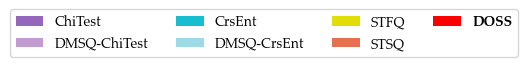

In [25]:
import matplotlib.patches as mpatches
 
figsize_para = (2.2 * 2, 0.3)
colnum = 4
fontsize = 10
 

fig_legend = plt.figure(figsize=figsize_para)
labels2 = ['ChiTest', 'DMSQ-ChiTest', 'CrsEnt', 'DMSQ-CrsEnt', 'STFQ', 'STSQ', 'DOSS']  # I want to control the displayed order, thereby hard coding
colors = [oracle_properties[oracle]['color'] for oracle in test_oracles]
legend_handles2 = [mpatches.Patch(facecolor=color, hatch=None, label=label) 
                for color, label in zip(colors, labels2)]

legend_handles = legend_handles2

ax_legend = fig_legend.add_subplot(111)

ax_legend.axis('off')  
legend = ax_legend.legend(ncol=colnum, handles=legend_handles, loc='center', fontsize=fontsize)
legend_texts = legend.get_texts()
legend_texts[-1].set_fontweight('bold')


save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2_statistics",
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, f"RQ2_boxplot_legend.pdf")
  

fig_legend.savefig(save_file, dpi=600, bbox_inches='tight', pad_inches=0.1)

#### Statistics and Counting

In [ ]:
from util.operation4dict import extract_keys
from util.statistical_testing import *

file_name = "RQ2_merged.json"
json_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2_statistics",
    file_name
)
with open(json_dir_rq2_2, "r") as f:
    req_res_dict = json.load(f)
    
# Extract the keys
key_dict = extract_keys(req_res_dict)

abb_names = key_dict[0]
program_versions = key_dict[1]
shot_list = key_dict[2]
test_oracles = [
    'ChiTest', 'DMSQ-ChiTest', 'CrsEnt', 'DMSQ-CrsEnt', 'STFQ', 'STSQ', 'DOSS'
]   # I want to control the displayed order, thereby hard coding

comp_groups = [
    'STSQ_vs_STFQ', 
    'DOSS_vs_STFQ', 
    'DOSS_vs_STSQ',
    'DMSQ-ChiTest_vs_ChiTest',
    'DMSQ-CrsEnt_vs_CrsEnt',
    'DOSS_vs_DMSQ-ChiTest',
    'DOSS_vs_DMSQ-CrsEnt'
]

stat_dict, count_dict = {}, {}

# Initialize count_dict
for comp_group in comp_groups:
    count_dict[comp_group] = {}
    for shots in shot_list:
        count_dict[comp_group][shots] = {
            "#_of_(p-value<=0.05)": 0,
            "#_of_(scaled_a12>0_and_(S))": 0,
            "#_of_(scaled_a12>0_and_(M))": 0,
            "#_of_(scaled_a12>0_and_(L))": 0
        }

for abb_name in abb_names:
    stat_dict[abb_name] = {}
    for ver_idx, program_version in enumerate(program_versions):
        stat_dict[abb_name][program_version] = {}
        for index, shots in enumerate(shot_list):
            stat_dict[abb_name][program_version][shots] = {}
            acc_dict = {
                oracle: req_res_dict[abb_name][program_version][shots][oracle]["acc_list"]
                for oracle in test_oracles
            }
            
            for comp_group in comp_groups:
                first_oracle, last_oracle = comp_group.split("_vs_")
                p_val, a12_val = return_pval_and_effectsize(acc_dict[first_oracle], acc_dict[last_oracle])
                scaled_a12, mag = nominal_magnitude(a12_val)
                winner = first_oracle if scaled_a12 > 0 else (last_oracle if scaled_a12 < 0 else "TIE!")
                
                # Update the statistics
                stat_dict[abb_name][program_version][shots][comp_group] = {
                    "p_value": p_val,
                    "whether_significant": bool(p_val <= 0.05),
                    "A12": a12_val,
                    "scaled_A12": scaled_a12,
                    "which_better": winner,
                    "maginitude": mag
                }

                # Update the counting
                count_dict[comp_group][shots]["#_of_(p-value<=0.05)"] += int(p_val <= 0.05)
                count_dict[comp_group][shots]["#_of_(scaled_a12>0_and_(S))"] += int(scaled_a12 > 0 and mag == "(S)")
                count_dict[comp_group][shots]["#_of_(scaled_a12>0_and_(M))"] += int(scaled_a12 > 0 and mag == "(M)")
                count_dict[comp_group][shots]["#_of_(scaled_a12>0_and_(L))"] += int(scaled_a12 > 0 and mag == "(L)")

# Save the dictionary as the json file
save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2_statistics",
)
os.makedirs(save_dir, exist_ok=True)
save_dict = {
    "RQ2_statistics.json": stat_dict,
    "RQ2_counting.json": count_dict
}
for file_name, data_dict in save_dict.items():
    save_file = os.path.join(save_dir, file_name)
    with open(save_file, 'w', encoding='utf-8') as f:
        json.dump(data_dict, f, indent=2)

#### Latex Code for Counting

In [20]:
import util.global_variables as gv
from util.operation4dict import extract_keys

text_len = 0.038    # For f"p{{{text_len}\\textwidth}}"

# Read the saved data of DOSS from RQ2-1
file_name = "RQ2_counting.json"
json_dir_rq2_1 = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2_statistics",
    file_name
)
with open(json_dir_rq2_1, "r") as f:
    res_dict = json.load(f)

comp_couples_displayed = [raw_comp_couple.replace("_vs_", "vs.") for raw_comp_couple in res_dict.keys()]
num_couples = len(comp_couples_displayed)
key_dict = extract_keys(res_dict)
shot_list = key_dict[1]
num_shot_vals = len(shot_list)
counting_conds = key_dict[2]


# Define LaTeX column formats and headers (This part will not change in the loop)
tex_tab_center_temp = f">{{\\centering\\arraybackslash}}p{{{text_len}\\textwidth}}" * num_shot_vals
tex_tab_center = f"|{tex_tab_center_temp}" * num_couples

tex_tab_comp_list = [f"& \\multicolumn{{{num_shot_vals}}}{{|c}}{{\\footnotesize{{\\textbf{{{couple}}}}}}}" for couple in comp_couples_displayed]
tex_tab_comp = "".join(tex_tab_comp_list)

tex_tab_shot_list = [f"& \\textbf{{\\emph{{s}}={shot}}} " for shot in shot_list] * num_couples
tex_tab_shot = "".join(tex_tab_shot_list)
 
# LaTeX header code
latex_header = f"""
\\begin{{tabular}}{{c{tex_tab_center}}}
    \\toprule[1.25pt]
    \\multirow{{2}}{{*}}{{\\textbf{{Conditions}}}} {tex_tab_comp}  \\\\
    \\cmidrule{{2-{(2 + num_couples * num_shot_vals - 1)}}} \n
    ~ {tex_tab_shot}  \\\\
"""

tex_conditions = [
    "$p\\text{{-value}} \\le 0.05$",
    "$\\hat{{A}}_{{12}}^{{\\text{scal}}} > 0$ \\& (S)",
    "$\\hat{{A}}_{{12}}^{{\\text{scal}}} > 0$ \\& (M)",
    "$\\hat{{A}}_{{12}}^{{\\text{scal}}} > 0$ \\& (L)"
]

# Generate the data for each program in the for loop
table_body = "    \\midrule   \n\n"
for cond_idx, counting_cond in enumerate(counting_conds):
    table_body += f"    {tex_conditions[cond_idx]}"
    for raw_comp_couple in res_dict.keys():
        for shots in shot_list:  
            table_body += f" & {res_dict[raw_comp_couple][str(shots)][counting_cond]}"
    table_body += " \\\\ \n"
 
latex_output = latex_header + table_body + "\n    \\bottomrule[1.25pt]\n\\end{tabular}"


save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ2_statistics",
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, f"RQ2_counting.tex")

# Output to file
with open(save_file, 'w') as f:
    f.write(latex_output)


## RQ3 Analysis for the Scalability

### Disposal Data

In [5]:
# Readin the default settings
total_repeats = gv.default_rq_settings['common']['total_repeats']
oracle_dict = gv.total_baselines

rq_task_setting = gv.default_rq_settings['RQ3']['task1']
rq_abb_names = rq_task_setting['abb_programs']              # List
rq_ver = rq_task_setting['program_version']
rq_fixed_shots = rq_task_setting['shots']
rq_oracles = rq_task_setting['test_oracles']                # List          
rq_backend = rq_task_setting['backend']          
rq_qubit_num_dict = rq_task_setting['total_qubits']         # List
rq_woo, rq_opo = rq_task_setting['errs']['woo'], rq_task_setting['errs']['opo']     

# Form the data dict
combined_varaibles = list(itertools.product(
        rq_abb_names,
        rq_oracles,
    )
)
stat_dict = {}

rq4_task1_dir = os.path.join(data_root_dir, "RQ3-1")

for abb_name, rq_oracle in combined_varaibles:
    rq_qubit_num = rq_qubit_num_dict[abb_name]
    for temp_qubit in rq_qubit_num:
        temp_repeats = 5 if abb_name == 'DO' and rq_oracle == "STFQ" and temp_qubit == 12 else total_repeats
        for repeat_idx in range(1, temp_repeats + 1):
            file_name = (
                f"{repeat_idx}_{abb_name}_{rq_ver}_RQ3_"
                f"{rq_oracle}_qubits={temp_qubit}.csv"
            )

            csv_dir = os.path.join(
                rq4_task1_dir,
                abb_name,
                rq_oracle,
                file_name
            )

            # Read the file
            df = pd.read_csv(csv_dir)
            req_header = df.columns[:6].tolist()   # The first 6 are the experimental results
            req_data = df.iloc[0, :6].tolist()
            
            # The first appearance
            if repeat_idx == 1:
                temp_res_dict = {
                    key: [int(val) if isinstance(val, (np.integer, int)) else val] # Int64 is not acceptable for json files
                        for key, val in zip(req_header, req_data)
                }
                # Initialization 
                stat_dict.setdefault(abb_name, {}).setdefault(rq_oracle, {}).setdefault(temp_qubit, temp_res_dict)
            else:   # Append to the constructed list
                for key, val in zip(req_header, req_data):
                    if isinstance(val, (np.integer, int)):  # Int64 is not acceptable for json files
                        stat_dict[abb_name][rq_oracle][temp_qubit][key].append(int(val))
                    else:
                        stat_dict[abb_name][rq_oracle][temp_qubit][key].append(val)

# Obtain the directory path of the raw data
save_dir = os.path.join(
    parent_dir,
    "data",
    "processed_data",
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, "RQ3-1.json")

# Save the dictionary as the json file
with open(save_file, 'w', encoding='utf-8') as f:
    json.dump(stat_dict, f, indent=2)

### JSON File

In [28]:
# Read the json file of RQ4-1 
file_name_ideal = "RQ3-1.json"
json_dir_ideal = os.path.join(
    parent_dir,
    "data",
    "processed_data",
    file_name_ideal
)
with open(json_dir_ideal, "r") as f:
    stat_dict = json.load(f)

req_res_dict = {}
for abb_name, data_of_a_program in stat_dict.items():
    req_res_dict[abb_name] = {}
    for oracle, data_of_an_oracle in data_of_a_program.items():
        req_res_dict[abb_name][oracle] = {}
        for num_qubits, data_of_a_qubit_num in data_of_an_oracle.items():
            acc_list = []
            for tp, tn, fp, fn in zip(
                data_of_a_qubit_num["true_pos"], 
                data_of_a_qubit_num["true_neg"], 
                data_of_a_qubit_num["false_pos"], 
                data_of_a_qubit_num["false_neg"]
            ):
                temp_acc = (tp + tn) / (tp + tn + fp + fn)
                acc_list.append(temp_acc)

            ave_acc = np.mean(acc_list)
            ave_time = np.mean(data_of_a_qubit_num["time"])

            req_res_dict[abb_name][oracle][num_qubits] = {
                "ave_acc": ave_acc,
                "ave_time": ave_time
            }


# Obtain the directory path of the raw data
save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ3-1"
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, f"RQ3-1_figure.json")

# Save the dictionary as the json file
with open(save_file, 'w', encoding='utf-8') as f:
    json.dump(req_res_dict, f, indent=2)


### Plotting for Faults and Time
 

#### Figures

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import util.global_variables as gv
from util.operation4dict import extract_keys

width = 0.1                    
fontsize = 14
labelsize = 12
linewidth = 1
markersize = 3
figsize_para = (2.4 * 2, 2.8)

linestyle_marker = {"samps": ['-.', '^'],
                    "probs": ['--', 'v'],
                    "swap_only":  [':', "o"],
                    "ours": ['-', '*']}

oracle_taxo = gv.opo_baselines
oracle_taxo["swap_only"] = ["STFQ", "STSQ"]
oracle_taxo["ours"] = ["DOSS"]

# Read the saved data of RQ3-1
file_name = "RQ3-1_figure.json"
json_dir_rq2_1 = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ3-1",
    file_name
)
with open(json_dir_rq2_1, "r") as f:
    res_dict = json.load(f)

key_dict = extract_keys(res_dict)
abb_names, test_oracles = key_dict[0], key_dict[1]

# Give the directory for saving
save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ3-1",
)

oracle_properties["STFQ"]["color"] = "#E49B0F" # Make clear of STFQ

for object_id, abb_name in enumerate(abb_names):
       fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize_para)
       for ora_id, oracle in enumerate(test_oracles):
              qubits_list = list(res_dict[abb_name][oracle].keys())
              x1 = range(len(qubits_list))
              
              # two_day_secs = 2 * 24 * 3600              # time limit
              # if abb_name == 'diagonal':
              #        ax2.axhline(y=two_day_secs, color='black', linestyle='--', linewidth=0.5)
              #        annotation = "Time-out boundary"
              #        ax2.annotate(annotation, xy=(3, two_day_secs), xytext=(3, two_day_secs - 100000),
              #        fontsize=8,
              #        horizontalalignment='center')

              if oracle == "DOSS":
                     templinewidth = linewidth + 0.2
                     tempmarkersize = markersize + 3
              else:
                     templinewidth = linewidth
                     tempmarkersize = markersize

              for tag, oracles_of_a_tag in oracle_taxo.items():
                     if oracle in oracles_of_a_tag:
                            templinestyle = linestyle_marker[tag][0]
                            tempmarker = linestyle_marker[tag][1]
              ax1.plot(x1, 
                      [temp_dict["ave_acc"] for temp_dict in res_dict[abb_name][oracle].values()],     # Average accuracy
                      color=oracle_properties[oracle]['color'],
                      linewidth=templinewidth,
                      linestyle=templinestyle,
                      marker=tempmarker,
                      markersize=tempmarkersize)   
              # ax1.plot(x1, [25]*len(x1), label='Truth', linewidth=linewidth-0.25, linestyle=':',color='black')

              ax2.plot(x1, 
                      [temp_dict["ave_time"] for temp_dict in res_dict[abb_name][oracle].values()],
                      color=oracle_properties[oracle]['color'],
                      linewidth=templinewidth,
                      linestyle=templinestyle,
                      marker=tempmarker,
                      markersize=tempmarkersize)       
 
              ax1.set_ylim(0, 1.05)
              ax1.set_yticks(np.arange(0, 1.05, 0.2))   

       ax1.set_ylabel('Accuracy', fontsize=fontsize)
       ax1.set_xlabel(r'Qubit numbers $n$', fontsize=fontsize)
       ax1.set_xticks(x1)                 # Set the scale positions
       ax1.set_xticklabels(qubits_list)   # Set the scale labels
       ax1.tick_params(axis='x', labelsize=labelsize)
       ax1.tick_params(axis='y', labelsize=labelsize)

       ax2.set_yscale('log')
       ax2.set_ylabel('Time (sec)', fontsize=fontsize)
       ax2.set_xlabel(r'Qubit numbers $n$', fontsize=fontsize)
       ax2.set_xticks(x1)                 # Set the scale positions
       ax2.set_xticklabels(qubits_list)   # Set the scale labels  
       ax2.tick_params(axis='x', labelsize=labelsize)
       ax2.tick_params(axis='y', labelsize=labelsize)
 
       plt.subplots_adjust(wspace=0.5)
       plt.suptitle(r'$\mathbf{' + abb_name + '}$', fontsize=fontsize, ha='center')

       ax1.grid(True, which='both', axis='both', linestyle='-', color="#F5F4F3D6", linewidth=1)
       ax2.grid(True, which='both', axis='both', linestyle='-', color="#F5F4F3D6", linewidth=1)
       
       # Save
       os.makedirs(save_dir, exist_ok=True)
       save_file = os.path.join(save_dir, f"{abb_name}_v1_RQ3.pdf")
       plt.savefig(save_file, dpi=600, bbox_inches='tight', pad_inches=0.1)
       plt.close()

#### Legend

Plot the legend

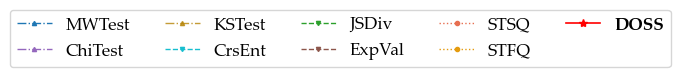

In [29]:
from matplotlib.lines import Line2D
from util.operation4dict import extract_keys
import util.global_variables as gv
# Read the saved data of RQ3-1
file_name = "RQ3-1_figure.json"
json_dir_rq2_1 = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ3-1",
    file_name
)
with open(json_dir_rq2_1, "r") as f:
    res_dict = json.load(f)

key_dict = extract_keys(res_dict)
abb_names, test_oracles = key_dict[0], key_dict[1]

# colors = ['#7FC4FD', '#038BFB', '#A065FF', '#548235', '#99D600', '#BBC400', '#FF8E11', 'red']
# oracle_labels = ['MWTest', 'KSTest', 'ChiTest', 'JSDiv', 'CrsEnt', 'STFQ', 'STSQ', 'HOSS']
linestyle_marker = {"samps": ['-.', '^'],
                    "probs": ['--', 'v'],
                    "swap_only":  [':', "o"],
                    "ours": ['-', '*']}

oracle_taxo = gv.opo_baselines
oracle_taxo["swap_only"] = ["STFQ", "STSQ"]
oracle_taxo["ours"] = ["DOSS"]

linewidth = 1
markersize = 3
fontsize = 12.5
labelsize = 10
figsize_para = (0.2, 0.3)

n_items = len(test_oracles)
linewidthlist = [linewidth] * n_items
linewidthlist[-1] = linewidth + 0.2 # type: ignore
 
markersizelist = [markersize] * n_items
markersizelist[-1] = markersize + 3

legend_elements = []

 
for idx, oracle in enumerate(test_oracles):
    for tag, oracles_of_a_tag in oracle_taxo.items():
        if oracle in oracles_of_a_tag:
            templinestyle = linestyle_marker[tag][0]
            tempmarker = linestyle_marker[tag][1]
            legend_elements.append(
                Line2D([0], [0], 
                color=oracle_properties[oracle]["color"], 
                linestyle=templinestyle, 
                label=oracle, 
                marker=tempmarker,
                linewidth=linewidthlist[idx],
                markersize=markersizelist[idx])
    )

plt.figure(figsize=figsize_para)
legend = plt.legend(ncol=5, handles=legend_elements, loc='center', fontsize=fontsize)
legend_texts = legend.get_texts()
legend_texts[-1].set_fontweight('bold')
plt.axis('off')
 

save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ3-1",
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, 'RQ3-1_legend.pdf')
plt.savefig(save_file, dpi=600, bbox_inches='tight', pad_inches=0.1)
 

## RQ4 Evaluation on Noisy Simulators

### Disposal Data

In [30]:
# Readin the default settings
total_repeats = gv.default_rq_settings['common']['total_repeats']
rq_task_setting = gv.default_rq_settings['RQ4']['task1']
rq_abb_names = rq_task_setting['abb_programs']      # List
rq_ver = rq_task_setting['program_version']
rq_fixed_shots = rq_task_setting['shots']
rq_oracle = rq_task_setting['test_oracle']          
rq_backends = rq_task_setting['backends']           # List
rq_qubit_num = rq_task_setting['total_qubits']       
rq_woos = rq_task_setting['woos']                   # List

# Form the data dict
combined_varaibles = list(itertools.product(
        rq_abb_names,
        rq_backends,
        rq_woos
    )
)
stat_dict = {}

rq4_task1_dir = os.path.join(data_root_dir, "RQ4-1")



for abb_name, backend, woo_err in combined_varaibles:
    for repeat_idx in range(1, total_repeats + 1):
        file_name = (
            f"{repeat_idx}_{abb_name}_{rq_ver}_RQ4_"
            f"{rq_oracle}_backend={backend}_err={woo_err}.csv"
        )

        csv_dir = os.path.join(
            rq4_task1_dir,
            abb_name,
            rq_oracle,
            file_name
        )

        # Read the file
        df = pd.read_csv(csv_dir)
        req_header = df.columns[:6].tolist()   # The first 6 are the experimental results
        req_data = df.iloc[0, :6].tolist()
        
        # The first appearance
        if repeat_idx == 1:
            temp_res_dict = {
                key: [int(val) if isinstance(val, (np.integer, int)) else val] # Int64 is not acceptable for json files
                     for key, val in zip(req_header, req_data)
            }
            # Initialization 
            stat_dict.setdefault(abb_name, {}).setdefault(backend, {}).setdefault(woo_err, temp_res_dict)
        else:   # Append to the constructed list
            for key, val in zip(req_header, req_data):
                if isinstance(val, (np.integer, int)):  # Int64 is not acceptable for json files
                    stat_dict[abb_name][backend][woo_err][key].append(int(val))
                else:
                    stat_dict[abb_name][backend][woo_err][key].append(val)

# Obtain the directory path of the raw data
save_dir = os.path.join(
    parent_dir,
    "data",
    "processed_data",
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, "RQ4-1.json")

# Save the dictionary as the json file
with open(save_file, 'w', encoding='utf-8') as f:
    json.dump(stat_dict, f, indent=2)

### Figures

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

# settings for plotting
colors = ['#7FC4FD', '#A065FF', 'red']
width = 0.1
labelsize = 12
fontsize = 14
linewidth = 1 
hatch_linewidth = 0.3
hatch_form = '//////'
figsize = (4.4, 3)
group_spacing = 0.66        # Spacing coefficient between program groups
group_gap = 0.54
dotline_pos = 1.55
dotline_width = 1.6
dot_size = 10

# Configuration control parameters
config = {
    'title_vert_offset': -14,  # Vertical offset for program titles (negative values move down)
    'title_horz_offset': 7,    # Horizontal offset for program titles (points, positive-right/negative-left)
    'xtick_label_pad': 3,      # Vertical offset for n-value labels (points)
}

# Load the default configuration
rq_task_setting = gv.default_rq_settings['RQ4']['task1']
rq_ver = rq_task_setting['program_version']
rq_fixed_shots = rq_task_setting['shots']
rq_woos = rq_task_setting['woos']                   # List

# Read the json file of RQ4-1 
file_name_noisy = "RQ4-1.json"
json_dir_noisy = os.path.join(
    parent_dir,
    "data",
    "processed_data",
    file_name_noisy
)
with open(json_dir_noisy, "r") as f:
    stat_dict = json.load(f)

# Read the ideal simulator of RQ2-1 as the baseline
file_name_ideal = "RQ2-1.json"
json_dir_ideal = os.path.join(
    parent_dir,
    "data",
    "processed_data",
    file_name_ideal
)
with open(json_dir_ideal, "r") as f:
    res_dict_rq2 = json.load(f)
# Add the results of DOSS to res_dict
for abb_name in stat_dict.keys():
    doss_ideal_dict = res_dict_rq2[abb_name][rq_ver][str(rq_fixed_shots)]["DOSS"]
    stat_dict[abb_name]["Ideal"] = {}
    for woo in rq_woos: # For convinience, we keep the DOSS result identical for different woos.
        stat_dict[abb_name]["Ideal"][woo] = doss_ideal_dict

# List to collect all the legend handles and labels for the main figure
all_lines = []
all_labels = []


save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ4-1",
)

for abb_name, data_of_a_program in stat_dict.items():
    fig, ax1 = plt.subplots(figsize=figsize)
    plt.grid(True, which='both', axis='both', linestyle='-', color="#F5F4F3D6", linewidth=1)

    # x-axis values
    x_column = list(next(iter(data_of_a_program.values())).keys())

    # Right y-axis for FPR
    ax2 = ax1.twinx()

    # Define color palette for the lines
    line_colors = {
        "Ideal": 'red', 
        "Manila":'#1f77b4', 
        "Vigo":'#800080', 
        "Athens":'#2ca02c'
    }  # Example colors for FNR/FPR, adjust as needed
    color_idx = 0  # Initialize index for color assignment

    for backend_idx, (backend, data_for_woos) in enumerate(data_of_a_program.items()):
        y_fpr = []
        y_fnr = []

        for err_idx, (woo_err, data_for_ouputs) in enumerate(data_for_woos.items()):
            metric_dict = {"fpr": [], "fnr": []}
            total_repeats = len(data_for_ouputs['true_pos'])

            for repeat_idx in range(total_repeats):
                temp_fpr = data_for_ouputs['false_pos'][repeat_idx] / (
                    data_for_ouputs['false_pos'][repeat_idx] + data_for_ouputs['true_neg'][repeat_idx])
                temp_fnr = data_for_ouputs['false_neg'][repeat_idx] / (
                    data_for_ouputs['false_neg'][repeat_idx] + data_for_ouputs['true_pos'][repeat_idx])
                metric_dict["fpr"].append(temp_fpr)
                metric_dict["fnr"].append(temp_fnr)

            final_fpr = np.mean(metric_dict['fpr'])
            final_fnr = np.mean(metric_dict['fnr'])

            y_fpr.append(final_fpr)
            y_fnr.append(final_fnr)

        # Plot FNR on the left y-axis (solid line)
        color = line_colors[backend]  # Get the color for FNR
        line_fnr, = ax1.plot(x_column, y_fnr, label=f'{backend} - FNR', linestyle='-', linewidth=linewidth, color=color)

        # Plot FPR on the right y-axis (dashed line)
        line_fpr, = ax2.plot(x_column, y_fpr, label=f'{backend} - FPR', linestyle='--', linewidth=linewidth, color=color)
        
        if backend != "Ideal":
            ax1.scatter(x_column, y_fnr, color=color, marker='o', s=dot_size, zorder=5)  # Data points for FNR
            ax2.scatter(x_column, y_fpr, color=color, marker='x', s=dot_size, zorder=5)  # Data points for FPR

        all_lines.extend([line_fnr, line_fpr])
        all_labels.extend([f'{backend} - FNR', f'{backend} - FPR'])

        color_idx += 2  # Increment by 2 to keep FPR and FNR on distinct colors

    # Labeling
    ax1.set_xlabel(r'$\varepsilon_{\text{tol}}$ for noisy simulators', fontsize=fontsize)
    ax1.set_ylabel('FNR', fontsize=fontsize)  # Left y-axis
    ax2.set_ylabel('FPR', fontsize=fontsize)  # Right y-axis

    ax1.set_title(r'$\mathbf{' + abb_name + '}$', fontsize=fontsize+1, ha='center')

    ax1.set_ylim(-0.1, 1.1)
    ax2.set_ylim(-0.1, 1.1)
    ax1.set_yticks(np.arange(-0, 1.1, 0.25)) 
    ax2.set_yticks(np.arange(-0, 1.1, 0.25)) 

    ax1.tick_params(axis='x', labelsize=labelsize)
    ax1.tick_params(axis='y', labelsize=labelsize)
    ax2.tick_params(axis='y', labelsize=labelsize)

    plt.tight_layout()
    # Save
    os.makedirs(save_dir, exist_ok=True)
    save_file = os.path.join(save_dir, f"{abb_name}_v1_RQ4-1.pdf")
    plt.savefig(save_file, dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.close()
 

### Plotting the Legend

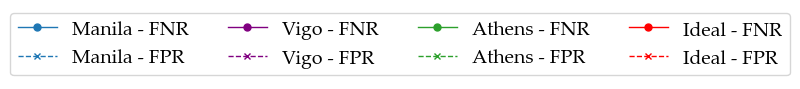

In [55]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# Assumed to be already defined:
# all_lines, all_labels, data_of_a_program, fontsize
# Your custom settings:
dot_size = 5
line_width = 1

num_backends = len(data_of_a_program.keys())
req_lines = all_lines[:2 * num_backends]
req_labels = all_labels[:2 * num_backends]
markers = ["o", "x"] * num_backends

# Build custom legend handles with appropriate color, linestyle, marker, etc.
custom_lines = []
for line, m in zip(req_lines, markers):
    custom_lines.append(
        Line2D(
            [0], [0],
            color=line.get_color(),           # Preserve original line color
            marker=m,                         # Use specified marker
            linestyle=line.get_linestyle(),   # Preserve original linestyle
            linewidth=line_width,             # Use specified line width
            markersize=dot_size               # Use specified marker size
        )
    )

# Create a separate figure for the legend
legend_fig, legend_ax = plt.subplots(figsize=(3, 1))
legend_ax.axis('off')  # Hide axes for a clean legend-only figure

# Add the custom legend to the figure
legend_ax.legend(custom_lines, req_labels, loc='center', fontsize=fontsize, ncol=num_backends)

# Adjust layout to ensure the legend is fully visible without clipping
legend_fig.subplots_adjust(top=0.85, bottom=0.15, left=0.05, right=0.95)

 

# Obtain the directory path of the raw data
save_dir = os.path.join(
    parent_dir,
    "data",
    "displayed_data",
    "RQ4-1",
)
os.makedirs(save_dir, exist_ok=True)
save_file = os.path.join(save_dir, 'RQ4-1_legend.pdf')
plt.savefig(save_file, dpi=600, bbox_inches='tight', pad_inches=0.1)
 